Hola **Alejandra**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Analisis para optimizar los Gastos de Marketing de Showz

Paso 1. Acceda los datos y prepáralos para el análisis

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Alejandra, la presentación de los notebooks es importante en esta profesión, por lo que te pediría incluir un título y una introducción al mismo. Los títulos los puedes generar escribiendo de la siguiente manera `# Título` en las celdas tipo markdown (no olvides el espacio después del #) y se ven de la siguiente forma:
    
# Título
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, así es mucho mejor la presentación
</div>

In [22]:
import pandas as pd

visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

for df, name in [(visits, "visits"), (orders, "orders"), (costs, "costs")]:
    print(f"\nDataset: {name}")
    print(f"Shape: {df.shape}")
    print(f"Primeras filas:\n{df.head()}")
    print(f"Columnas:\n{df.columns}")
    print(f"Tipos de datos:\n{df.dtypes}")
    





Dataset: visits
Shape: (359400, 5)
Primeras filas:
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
Columnas:
Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')
Tipos de datos:
Device       object
End Ts       object
Source Id     int64
Start Ts     object
Uid          uint64
dtype: object

Dataset: orders
Shape: (50415, 3)
Primeras filas:
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Procura que la importación de librerías, carga de datos y exploración de estos sea cada paso en celdas separadas para más claridad de lo que estás mostrando en cada celda
</div>

## Revisión de Dataset Visits

In [23]:
#Revisión de nombres de columnas del dataset visits
visits.rename(columns={
    'Device': 'device',
    'End Ts': 'end_ts',
    'Source Id': 'source_id',
    'Start Ts': 'start_ts',
    'Uid': 'uid'
}, inplace=True)


#Conversión de fechas y tiempos
visits['start_ts'] = pd.to_datetime(visits['start_ts'], errors='coerce')
visits['end_ts'] = pd.to_datetime(visits['end_ts'], errors='coerce')


#Revisar si hay errores que no pudieron convertirse (NaT)
print(visits[['start_ts', 'end_ts']].isnull().sum())




start_ts    0
end_ts      0
dtype: int64


In [24]:
#Calcular la duración de la visita
visits['visit_duration_minutes'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60
print(visits[visits['visit_duration_minutes'] < 0])


         device              end_ts  source_id            start_ts  \
4181    desktop 2018-03-25 03:18:00          3 2018-03-25 03:50:00   
177972  desktop 2018-03-25 03:09:00          9 2018-03-25 03:55:00   

                         uid  visit_duration_minutes  
4181    13092152539246794986                   -32.0  
177972   4621202742905035453                   -46.0  


In [25]:
#Verificar valores categóricos
print(visits['device'].value_counts())

desktop    262567
touch       96833
Name: device, dtype: int64


In [26]:
#Verifica valores nulos
print(visits.isnull().sum())

device                    0
end_ts                    0
source_id                 0
start_ts                  0
uid                       0
visit_duration_minutes    0
dtype: int64


## Revision de Dataset orders

In [27]:
#Verificar y corregir nombres de columnas


orders.rename(columns={
    'Buy Ts': 'buy_ts',
    'Revenue': 'revenue',
    'Uid': 'uid',
}, inplace=True)


#Revisar tipos de datos
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], errors='coerce')
orders['revenue'] = pd.to_numeric(orders['revenue'], errors='coerce')

#Buscar valores faltantes
print(orders.isnull().sum())
print(orders.describe())

#Validar fechas y coherencia temporal
print(orders['buy_ts'].min(), orders['buy_ts'].max())




buy_ts     0
revenue    0
uid        0
dtype: int64
            revenue           uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19
2017-06-01 00:10:00 2018-06-01 00:02:00


# Revision de dataset costs


In [28]:
##Revisión de tipo de datos
df['dt'] = pd.to_datetime(df['dt'], errors='coerce')

#Revisión de Nulos
print(df.isnull().sum())

print(df['costs'].describe())

source_id    0
dt           0
costs        0
dtype: int64
count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64


In [29]:
#Revisando como quedan finalmente las bases de datos para trabajar el análisis
for df, name in [(visits, "visits"), (orders, "orders"), (costs, "costs")]:
    print(f"\nDataset: {name}")
    print(f"Shape: {df.shape}")
    print(f"Primeras filas:\n{df.head()}")
    print(f"Columnas:\n{df.columns}")
    print(f"Tipos de datos:\n{df.dtypes}")



Dataset: visits
Shape: (359400, 6)
Primeras filas:
    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  visit_duration_minutes  
0  16879256277535980062                    18.0  
1    104060357244891740                    28.0  
2   7459035603376831527                     0.0  
3  16174680259334210214                    24.0  
4   9969694820036681168                     0.0  
Columnas:
Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid',
       'visit_duration_minutes'],
      dtype='object')
Tipos de datos:
device                            object
end_ts                    datetime64[ns]
source_id                         

In [30]:
print (visits.columns)
print(orders.columns)
print(costs.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid',
       'visit_duration_minutes'],
      dtype='object')
Index(['buy_ts', 'revenue', 'uid'], dtype='object')
Index(['source_id', 'dt', 'costs'], dtype='object')


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la exploración iniial de tus datos! Procura no tener varios procesos que generen más de una salida en una sola celda, por ejemplo, no tengas varios `.info()` en una misma celda sino en varios para que sea clara que parte genera cada salida
</div>

# 2. Haz informes y calcula métricas 
	Visitas:
1.	¿Cuántas personas lo usan cada día, semana y mes?
2.	¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
3.	¿Cuál es la duración de cada sesión?
4.	¿Con qué frecuencia los usuarios regresan?

## 1.Visitas

#### 1.1.¿Cuántas personas lo usan por día, semana y mes ?

In [31]:
# Asegurarnos de que start_ts esté en formato datetime
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

# Extraemos el día, semana y mes
visits['day'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['month'] = visits['start_ts'].dt.month

# Número de usuarios únicos por día, semana y mes
usuarios_por_dia = visits.groupby('day')['uid'].nunique()
usuarios_por_semana = visits.groupby('week')['uid'].nunique()
usuarios_por_mes = visits.groupby('month')['uid'].nunique()

# Cálculo del promedio de usuarios activos
dau_promedio = usuarios_por_dia.mean()  # Promedio diario
wau_promedio = usuarios_por_semana.mean()  # Promedio semanal
mau_promedio = usuarios_por_mes.mean()  # Promedio mensual

# Resultados finales
print(f"Promedio de DAU (Usuarios Activos Diarios): {dau_promedio:.2f}")
print(f"Promedio de WAU (Usuarios Activos Semanales): {wau_promedio:.2f}")
print(f"Promedio de MAU (Usuarios Activos Mensuales): {mau_promedio:.2f}")



Promedio de DAU (Usuarios Activos Diarios): 907.99
Promedio de WAU (Usuarios Activos Semanales): 5825.29
Promedio de MAU (Usuarios Activos Mensuales): 23228.42


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Está bien calcular estas métricas por cada mes, día o semana pero para presentar las métrias de DAU, MAE, WAU debes mostrar un sólo valor, es decir de los resultados que ya tienes saca el promedio para mostrar los usuarios.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, si bien es bueno revisar a detalle cada métrica al momento de comunicar hay que presentarlo de manera general y sólo si se necesita revisar algo puntual hacerlo más a detalle
</div>

#### 1.2. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [32]:
# Contar sesiones por día
sesiones_por_dia = visits.groupby('day')['uid'].count()  # Usamos 'uid' para contar las sesiones

sesiones_por_dia_df = sesiones_por_dia.reset_index()
sesiones_por_dia_df.columns = ['Día', 'Sesiones']  # Renombrar columnas# Calcular el promedio de sesiones por día
promedio_sesiones = sesiones_por_dia.mean()

#print(sesiones_por_dia_df)
print(f"Promedio de sesiones por día: {promedio_sesiones:.2f}")

Promedio de sesiones por día: 987.36


#### 1.3.¿Cuál es la duración de cada sesión?


In [33]:
# Asegurarnos de que visit_duration_minutes esté en minutos
visits['visit_duration_minutes'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

# Promedio diario
promedio_diario = visits.groupby(visits['start_ts'].dt.date)['visit_duration_minutes'].mean().mean()

# Promedio semanal
visits['week'] = visits['start_ts'].dt.to_period('W').dt.start_time  # Agregar columna de semana
promedio_semanal = visits.groupby('week')['visit_duration_minutes'].mean().mean()

# Promedio mensual
visits['month'] = visits['start_ts'].dt.to_period('M').dt.start_time  # Agregar columna de mes
promedio_mensual = visits.groupby('month')['visit_duration_minutes'].mean().mean()

# Resultados
print(f"Duración promedio de las sesiones (en minutos):")
print(f"Por día: {promedio_diario:.2f} minutos")
print(f"Por semana: {promedio_semanal:.2f} minutos")
print(f"Por mes: {promedio_mensual:.2f} minutos")

Duración promedio de las sesiones (en minutos):
Por día: 10.36 minutos
Por semana: 10.50 minutos
Por mes: 10.53 minutos


#### 1.4 ¿Con que frecuencia los usuarios regresan ?

In [34]:
# Asegúrate de que las fechas estén en el formato correcto
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

# Ordenamos por usuario y fecha de visita
visits.sort_values(by=['uid', 'start_ts'], inplace=True)

# Calculamos la fecha de la visita anterior para cada usuario
visits['previous_visit'] = visits.groupby('uid')['start_ts'].shift(1)

# Calculamos la diferencia en días entre visitas
visits['time_between_visits'] = (visits['start_ts'] - visits['previous_visit']).dt.days

# Establecemos el período de análisis, por ejemplo, 365 días
periodo_dias = 365

# Filtramos las visitas que ocurrieron dentro del período definido
frecuencia_regreso = visits[visits['time_between_visits'] <= periodo_dias]

# Agrupamos por usuario para contar cuántas visitas tiene cada uno dentro del período
frecuencia_regreso_por_usuario = frecuencia_regreso.groupby('uid').size()

# Calculamos el promedio de visitas dentro del período
promedio_visitas = frecuencia_regreso_por_usuario.mean()

# Imprimimos los resultados
print(f"Promedio de visitas dentro de {periodo_dias} días: {promedio_visitas:.2f}")

Promedio de visitas dentro de 365 días: 2.52


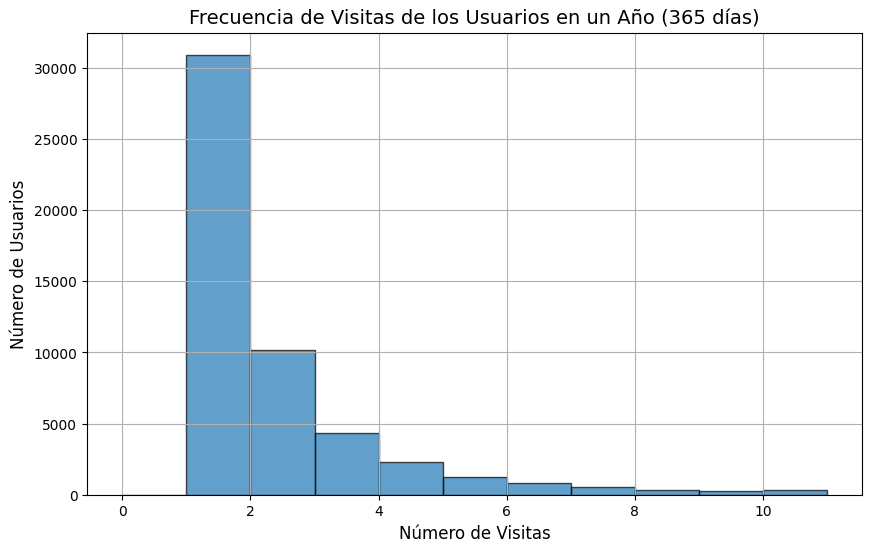

In [35]:
import matplotlib.pyplot as plt

# Calculamos la frecuencia de visitas dentro de un año (365 días)
visitas_por_usuario = frecuencia_regreso_por_usuario


bins = range(0, 12, 1)  # Intervalos de 1 en 1, de 0 a 10 visitas

# Graficamos el histograma con los nuevos bins
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.hist(visitas_por_usuario, bins=bins, edgecolor='black', alpha=0.7)
plt.title('Frecuencia de Visitas de los Usuarios en un Año (365 días)', fontsize=14)
plt.xlabel('Número de Visitas', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)
plt.grid(True)

# Mostramos el gráfico
plt.show()

Interpretación:  Cada usuario regresa 1 o 3 veces al año en promedio. Esto se pudiera considerar bajo, pero si los eventos son de precio elevado quizá sea normal  asistir a eventos 1 o 3 veces al año. 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes el cálculo por cada usuario de manera correcta, pero para presentar los resultados no es correcto presentar los resultados de forma tan granurar por cada usuario. Podrías usar histogramas para ver cómo está la distribución de las visitas o de cuantas veces regresan los usuarios
</div>

## 2. Ventas

#### 2.1 ¿Cuando empiezan a comprar los usuarios?
#### Calcular el tiempo transcurrido entre el registro de un usuario y su primera compra.

In [36]:
# Combinar las tablas visits y orders
data = visits[['uid', 'start_ts']].drop_duplicates().merge(
    orders[['uid', 'buy_ts']], on='uid', how='inner'
)

# Calcular el tiempo entre registro y la primera compra
data['conversion_days'] = (data['buy_ts'] - data['start_ts']).dt.days

#conversion_days: Representa cuántos días después del registro ocurrió la primera compra.

#Categorizar en cohortes de conversión

def categorize_conversion(days):
    if days == 0:
        return 'Conversion 0d'
    elif days == 1:
        return 'Conversion 1d'
    elif days <= 7:
        return 'Conversion 2-7d'
    elif days <= 30:
        return 'Conversion 8-30d'
    else:
        return 'Conversion >30d'

data['conversion_cohort'] = data['conversion_days'].apply(categorize_conversion)


# Contar usuarios por cohorte
conversion_analysis = data.groupby('conversion_cohort')['uid'].nunique().reset_index()
conversion_analysis.columns = ['Conversion Cohort', 'User Count']

# Ordenar para visualización
conversion_analysis.sort_values(by='User Count', ascending=False, inplace=True)

print("Distribución de usuarios por cohorte de conversión:")
print(conversion_analysis)



Distribución de usuarios por cohorte de conversión:
  Conversion Cohort  User Count
0     Conversion 0d       32904
2   Conversion 2-7d       13905
4   Conversion >30d        7076
3  Conversion 8-30d        4482
1     Conversion 1d        2434


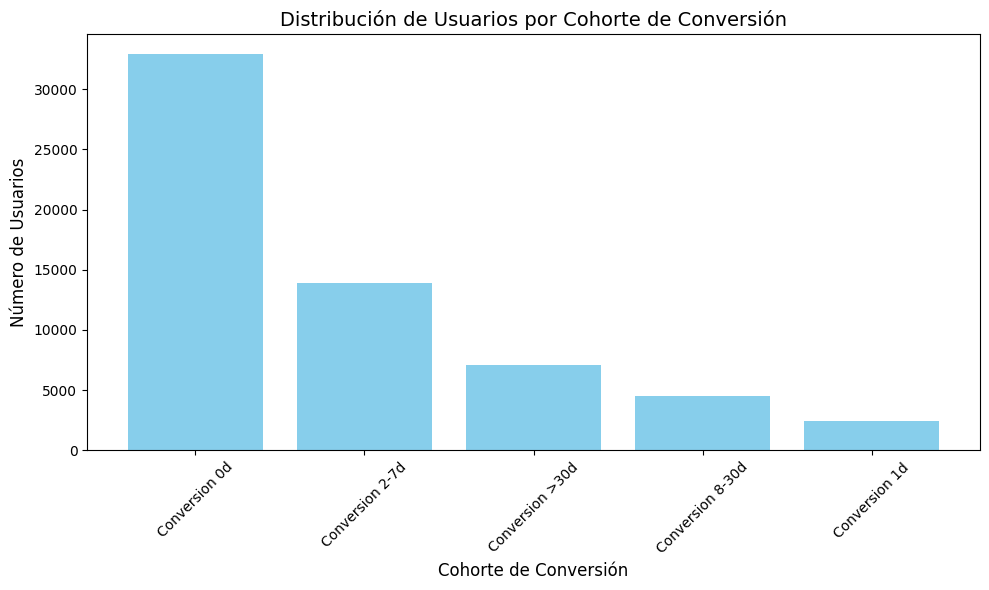

In [37]:
import matplotlib.pyplot as plt

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(conversion_analysis['Conversion Cohort'], conversion_analysis['User Count'], color='skyblue')

# Añadir título y etiquetas
plt.title('Distribución de Usuarios por Cohorte de Conversión', fontsize=14)
plt.xlabel('Cohorte de Conversión', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)

# Mejorar la visualización (rotación de etiquetas si es necesario)
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()  # Asegura que las etiquetas no se corten
plt.show()

Este análisis puede ser útil para comprender los ciclos de decisión de los usuarios y tomar decisiones sobre cuándo y cómo optimizar las estrategias de marketing y retención para incentivar las conversiones más rápidas o mejorar la retención de los usuarios que tardan más tiempo en convertir. 0d y 1d son usuarios que se registraron y les tomó de 0 a 1 días para realizar la compra, son usuarios donde se logra una conversión rápida.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Aquí podrías complementar con una gráfica de barras también
</div>

#### 2.2 ¿Cuántos pedidos hacen durante un periodo de tiempo?

In [38]:
# Definir el período de tiempo
start_date = '2018-01-01'
end_date = '2018-12-31'

# Filtrar pedidos en el rango de tiempo
pedidos_periodo = orders[(orders['buy_ts'] >= start_date) & (orders['buy_ts'] <= end_date)]

# Contar la cantidad de pedidos en el período
cantidad_pedidos = pedidos_periodo.shape[0]

print(f"Número de pedidos entre {start_date} y {end_date}: {cantidad_pedidos}")

Número de pedidos entre 2018-01-01 y 2018-12-31: 22948


#### 2.3 ¿Cuál es el tamaño promedio de compra?

In [39]:
# Calcular el tamaño promedio de compra
tamano_promedio_compra = orders['revenue'].mean()

print(f"El tamaño promedio de compra es: ${tamano_promedio_compra:.2f}")

El tamaño promedio de compra es: $5.00


#### 2.4 ¿Cuánto dinero traen? (LTV - Lifetime Value)
#### El LTV (Valor del Tiempo de Vida) mide cuánto dinero aporta un cliente durante su tiempo como usuario.

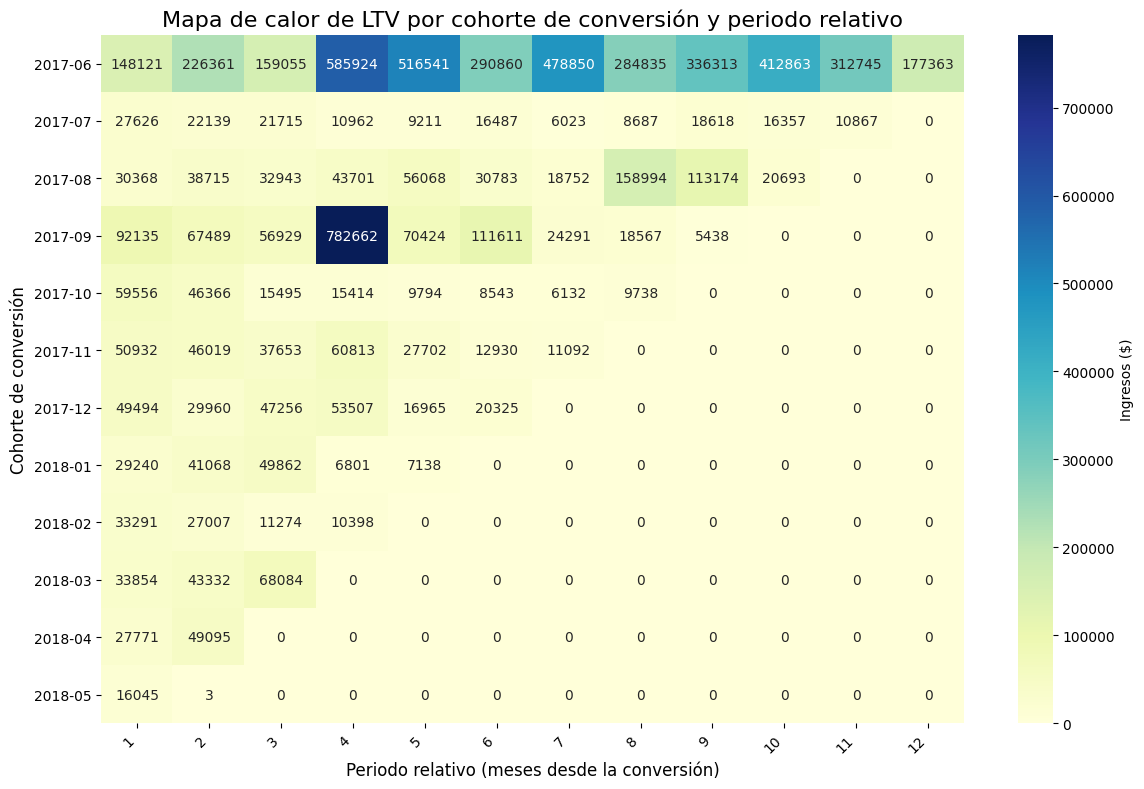

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que las columnas 'buy_ts' y 'start_ts' sean de tipo datetime
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

# Crear la cohorte de conversión basada en el primer registro de cada usuario
visits['conversion_cohort'] = visits.groupby('uid')['start_ts'].transform('min').dt.to_period('M')

# Crear un periodo relativo de pedidos desde la cohorte de conversión
orders = orders.merge(
    visits[['uid', 'conversion_cohort']], 
    on='uid', 
    how='left'
)
orders['order_period'] = ((orders['buy_ts'].dt.to_period('M') - orders['conversion_cohort']).apply(lambda x: x.n) + 1)

# Calcular el ingreso total por usuario y periodo relativo
ltv_por_usuario_periodo = orders.groupby(['conversion_cohort', 'order_period'])['revenue'].sum().reset_index()

# Crear una tabla dinámica para calcular el LTV por cohorte y periodo relativo
pivot_table = ltv_por_usuario_periodo.pivot_table(
    index='conversion_cohort', 
    columns='order_period', 
    values='revenue', 
    aggfunc='sum', 
    fill_value=0  # Rellenar valores nulos con 0
)
#print(pivot_table)

# Convertir el índice de la tabla pivote a cadenas para evitar errores
pivot_table.index = pivot_table.index.astype(str)

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    cmap="YlGnBu",       # Escala de color
    annot=True,          # Mostrar valores en las celdas
    fmt=".0f",           # Formato sin decimales
    cbar_kws={'label': 'Ingresos ($)'},  # Etiqueta de la barra de color
)

# Configurar el gráfico
plt.title("Mapa de calor de LTV por cohorte de conversión y periodo relativo", fontsize=16)
plt.xlabel("Periodo relativo (meses desde la conversión)", fontsize=12)
plt.ylabel("Cohorte de conversión", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas en el eje X
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Interpretación
La cohorte 2017-06 tiene el mayor LTV acumulado y contribuye de manera significativa en todos los períodos. Esto refleja una estrategia efectiva de adquisición y retención de clientes durante ese período.
El crecimiento sostenido en los períodos posteriores sugiere una base de clientes con mayor fidelidad y hábitos de compra recurrentes.

Rendimiento Decreciente en Cohortes Posteriores:
A partir de 2017-07, las cohortes presentan una disminución en el LTV inicial y una caída más rápida en los períodos posteriores. Esto podría deberse a:
Menor efectividad en las campañas de adquisición.
Clientes con menor poder adquisitivo o menor compromiso a largo plazo.

Picos Específicos y Retención Baja:
La cohorte 2017-09 muestra un pico excepcional en el período 4 (782,662.32), seguido de una caída abrupta. Esto sugiere una promoción puntual o evento que atrajo clientes, pero sin estrategias suficientes para mantenerlos activos a largo plazo.

Cohortes de 2018 con LTV Bajo:
Las cohortes de 2018-01 en adelante presentan un LTV inicial más bajo y caídas rápidas en los períodos siguientes.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Nuevamente la situación de presentar los resultados de manera tan granular por cada usuario, aquí podrías calcular el LTV por cada cohort apoyándote de pivot_table y el resultado de esto lo graficas en una gráfica tipo mapa de calor
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Debes calcularlo por cada cohort, es decir, por cada mes cómo lo haces más adelante con la métrica de gastos
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, así tiene más detalle la métrica para cada cohort
</div>

## 3. Marketing

1¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo) 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? 3. ¿Cuán rentables eran las inversiones? (ROMI)

#### 3.1 ¿Cuánto dinero se gastó?

source_id       1        2         3        4        5       9       10
month                                                                  
2017-06    1125.61  2427.38   7731.65  3514.80  2616.12  285.22  314.22
2017-07    1072.88  2333.11   7674.37  3529.73  2998.14  302.54  329.82
2017-08     951.81  1811.05   6143.54  3217.36  2185.28  248.93  232.57
2017-09    1502.01  2985.66   9963.55  5192.26  3849.14  415.62  460.67
2017-10    2315.75  4845.00  15737.24  6420.84  5767.40  609.41  627.24
2017-11    2445.16  5247.68  17025.34  5388.82  6325.34  683.18  792.36
2017-12    2341.20  4897.80  16219.52  7680.47  5872.52  657.98  645.86
2018-01    2186.18  4157.74  14808.78  5832.79  5371.52  547.16  614.35
2018-02    2204.48  4474.34  14228.56  5711.96  5071.31  551.50  480.88
2018-03    1893.09  3943.14  13080.85  5961.87  4529.62  480.29  526.41
2018-04    1327.49  2993.70   9296.81  4408.49  3501.15  373.49  388.25
2018-05    1467.61  2689.44   9411.42  4214.21  3669.56  362.17 

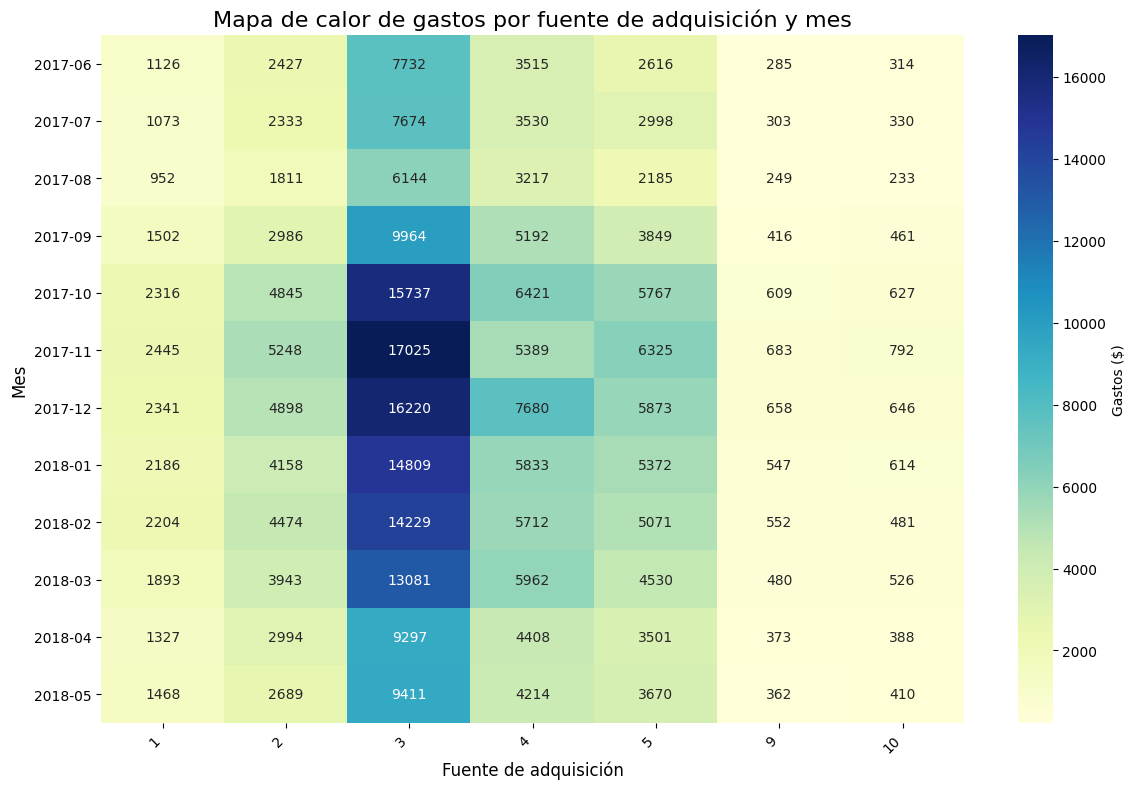

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'dt' esté en formato datetime
costs['dt'] = pd.to_datetime(costs['dt'])

# Crear una columna para el mes
costs['month'] = costs['dt'].dt.to_period('M')

# Crear la pivot table para sumar los costos por fuente y mes
pivot_table = costs.pivot_table(
    index='month',       # Índice será el mes
    columns='source_id', # Columnas serán las fuentes de adquisición
    values='costs',      # Valores a sumar serán los costos
    aggfunc='sum',       # Agregación será la suma
    fill_value=0         # Rellenar valores nulos con 0
)
print(pivot_table)

# Convertir el índice de la tabla pivote a cadenas para evitar errores
pivot_table.index = pivot_table.index.astype(str)

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    cmap="YlGnBu",       # Escala de color
    annot=True,          # Mostrar valores en las celdas
    fmt=".0f",           # Formato sin decimales
    cbar_kws={'label': 'Gastos ($)'},  # Etiqueta de la barra de color
)

# Configurar el gráfico
plt.title("Mapa de calor de gastos por fuente de adquisición y mes", fontsize=16)
plt.xlabel("Fuente de adquisición", fontsize=12)
plt.ylabel("Mes", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas en el eje X
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Distribución de los costos por fuente:

Las fuentes con los IDs 3 y 4 presentan consistentemente los gastos más altos en todos los meses, lo que sugiere que son fuentes principales de adquisición.
Las fuentes con los IDs 9 y 10 tienen gastos significativamente más bajos, indicando que podrían ser canales secundarios o que reciben menor inversión.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien calculado los gastos por cada cohort y fuente! Complementa esta parte con una gráfica tipo mapa de calor
</div>

#### 3.2. ¿Cuál fue el costo de adquisición de clientes (CAC) de cada una de las fuentes?

In [42]:
#El CAC se calcula dividiendo el total gastado por el número de clientes adquiridos (uid
# Número de clientes únicos por fuente
clientes_por_fuente = visits.groupby('source_id')['uid'].nunique().reset_index()
clientes_por_fuente.columns = ['source_id', 'clientes']

# Combinar con los gastos
cac = gastos_por_fuente.merge(clientes_por_fuente, on='source_id')
cac['cac'] = cac['costs'] / cac['clientes']

print(cac)


NameError: name 'gastos_por_fuente' is not defined

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Asegurarse de que las fechas estén en formato datetime
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['month'] = visits['start_ts'].dt.to_period('M')

costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.to_period('M')

# 2. Número de clientes únicos por fuente y mes
clientes_por_cohort = visits.groupby(['month', 'source_id'])['uid'].nunique().reset_index()
clientes_por_cohort.columns = ['month', 'source_id', 'clientes']

# 3. Gastos totales por fuente y mes
gastos_por_cohort = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()

# 4. Combinar datos de clientes y gastos
cac_cohort = gastos_por_cohort.merge(clientes_por_cohort, on=['month', 'source_id'], how='left')
cac_cohort['cac'] = cac_cohort['costs'] / cac_cohort['clientes']

# 5. Crear una tabla pivote para el mapa de calor
pivot_cac = cac_cohort.pivot_table(
    index='month', 
    columns='source_id', 
    values='cac', 
    aggfunc='mean', 
    fill_value=0
)

# 6. Generar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_cac, 
    cmap="YlGnBu", 
    annot=True, 
    fmt=".2f", 
    cbar_kws={'label': 'Costo de Adquisición (CAC)'}
)
plt.title("Mapa de calor del Costo de Adquisición por Fuente y Mes", fontsize=16)
plt.xlabel("Fuente de adquisición")
plt.ylabel("Mes")
plt.show()

Comparación de CAC por Fuente
El CAC más alto se encuentra en la fuente 3, con 1.89. Esto significa que adquirir un cliente a través de esta fuente cuesta $1.89 en promedio, lo cual podría indicar que es una fuente costosa o menos eficiente.

El CAC más bajo es de la fuente 9, con 0.59. Esto implica que esta fuente es más económica para adquirir clientes, con un costo promedio de $0.59 por cliente.

Relación entre "costs" y "clientes"

Las fuentes 3 y 4 tienen grandes diferencias en eficiencia:

 Fuente 3: Aunque tiene el gasto más alto (141,321.63), su CAC es el mayor (1.89), lo que sugiere que no genera tantos clientes en relación con la inversión.
 Fuente 4: A pesar de gastar menos (61,073.60), tiene un CAC mucho más bajo (0.73), lo que indica que es más efectiva en atraer clientes.
 Evaluación de la Eficiencia
 Fuentes con CAC bajo (como 4, 5, 9, y 10) pueden ser consideradas más eficientes, ya que logran atraer clientes a menor costo.
 Fuentes con CAC alto (como 3 y 2) deberían ser analizadas para entender si los clientes obtenidos son de mayor calidad o si existen problemas en su estrategia de adquisición.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El CAC también podrías calcularlo por cada cohort y fuente y mostrarlo en una gráfica tipo mapa de calor
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Perfecto, así es mucho más claro revisar que cohort tuvo mayor o menor costo de adquisición
</div>

#### 3.3 ¿Cuán rentables eran las inversiones? (ROMI)

El ROMI (Return on Marketing Investment) se calcula como:

𝑅𝑂𝑀𝐼=
(Ingresos generados−Costos de marketing)/Costos de Marketing


# ¿Cuán rentables eran las inversiones? (ROMI)

In [ ]:
# Asegurarnos de que las fechas están en formato datetime
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Sumar ingresos (revenue) por cada fuente de adquisición
revenue_per_source = visits.merge(orders, on='uid', how='inner') \
                           .groupby('source_id')['revenue'].sum()

# Sumar costos de marketing por cada fuente
costs_per_source = costs.groupby('source_id')['costs'].sum()

# Calcular el ROMI por fuente
romi_data = pd.DataFrame({
    'total_revenue': revenue_per_source,
    'total_costs': costs_per_source
})

romi_data['romi'] = (romi_data['total_revenue'] / romi_data['total_costs']) - 1

# Crear la pivot table (tabla dinámica) con ROMI por fuente
pivot_table_romi = romi_data.reset_index()

# Mostrar la tabla
print(pivot_table_romi)

# Graficar ROMI por fuente de adquisición
plt.figure(figsize=(10, 6))
plt.bar(pivot_table_romi['source_id'], pivot_table_romi['romi'], color='skyblue')
plt.title('ROMI por Fuente de Adquisición')
plt.xlabel('Fuente de Adquisición (source_id)')
plt.ylabel('ROMI')
plt.xticks(pivot_table_romi['source_id'], rotation=45)
plt.tight_layout()
plt.show()

# Interpretación de los resultados: 
    
Fuentes altamente rentables: Las fuentes 1, 2, 5, y 4 tienen altos ROMI, siendo las mejores opciones para priorizar inversiones.
Fuentes de bajo rendimiento: La fuente 3 tiene un ROMI apenas positivo, por lo que se debe evaluar si es necesario optimizar su estrategia.
Fuentes sin datos completos: La fuente 7 tiene datos incompletos; es necesario verificar si realmente hubo costos asociados.
Este análisis ayuda a tomar decisiones estratégicas sobre dónde enfocar los recursos de marketing para maximizar la rentabilidad.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Ten cuidado con el tipo de celdas que declares, esta debería ser tipo Markdown para evitar el error de sintaxis
</div>

# Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

# Recomendaciones de inversión:
1. Optimizar la inversión en fuentes de alta rentabilidad (ROMI alto):
Fuente 1 y Fuente 5:
Estas fuentes muestran un ROMI alto (109.31 y 21.82 respectivamente). Aumentar la inversión aquí podría maximizar los ingresos, especialmente en el caso de Fuente 1, que tiene el ROMI más alto.

2. Reducir o reevaluar fuentes con bajo ROMI:
Fuente 3 y Fuente 10:
Estas fuentes tienen ROMIs bajos (1.10 y 1.51 respectivamente), lo que indica que el retorno no compensa los costos. Considera reducir la inversión o analizar estrategias específicas para mejorar su rendimiento.

3. Incentivar la retención a largo plazo (LTV alto):
Los usuarios que convierten después de 30 días (Conversion >30d) tienen el LTV más alto ($925.74). Implementa estrategias de remarketing y engagement para retener usuarios a largo plazo y aumentar su valor.

4. CAC más bajo no siempre significa mejor fuente:
Aunque Fuente 9 y Fuente 10 tienen el CAC más bajo ($0.60 y $0.72 respectivamente), su ROMI es bajo (5.59 y 1.51). Asegúrate de evaluar el impacto real de estas fuentes en los ingresos.

5. Distribución de presupuesto por mes:
Picos de gasto: Octubre, noviembre y diciembre de 2017.
Estos meses presentan altos costos y deben correlacionarse con los ingresos generados en ese periodo para justificar las inversiones.
Meses de bajo gasto: Enero a mayo de 2018.
Analiza si estas inversiones limitadas afectaron la adquisición o conversión de usuarios.


Distribuir más presupuesto a Fuente 1 y Fuente 5, dado su alto ROMI y potencial de generación de ingresos.
Reducir gastos en Fuente 3 y Fuente 10 o implementar estrategias específicas para aumentar su rentabilidad.
Aumentar el enfoque en retención y remarketing para usuarios con potencial de conversión tardía (Conversion >30d), ya que estos usuarios generan el mayor LTV.
Evaluar estacionalidad: Realiza un análisis estacional para identificar los meses más rentables y ajustar el presupuesto de marketing de acuerdo con las tendencias de comportamiento del usuario.



<div class="alert alert-block alert-danger">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen avance de tu proyecto Alejandra! Sin embargo tienes varios puntos de mejora en los que te he dejado comentarios para esto, tambiénte pediría que seas más detallada en la conclusión final y las recomendaciones ya que aquí debes hacer tipo un resúmen de todos los hallazgos desde el inicio del notebook pero enfocándote en los puntos principales.
    
También te pediría redactar tus interpretaciones de los cálculos o visualizaciones que presentes ya que hay varias secciones que solo presentas números sin ninguna explicación y es importante comunicar de manera clara lo que se está presentando.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (4ta Iteracion)</b> <a class=“tocSkip”></a>

Buen t
</div>